In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor

In [58]:
songs = pd.read_csv('spotify_songs.csv')
print(songs.head())
print(songs.columns)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...            

In [59]:
songs = songs[['track_id', 'track_artist', 'track_name', 'track_popularity', 'playlist_genre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

In [60]:
print(songs.head())

track_id      track_artist  \
0  6f807x0ima9a1j3VPbc7VN        Ed Sheeran   
1  0r7CVbZTWZgbTCYdfa2P31          Maroon 5   
2  1z1Hg7Vb0AhHDiEmnDE79l      Zara Larsson   
3  75FpbthrwQmzHlBJLuGdC7  The Chainsmokers   
4  1e8PAfcKUYoKkxPhrHqw4x     Lewis Capaldi   

                                          track_name  track_popularity  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...                66   
1                    Memories - Dillon Francis Remix                67   
2                    All the Time - Don Diablo Remix                70   
3                  Call You Mine - Keanu Silva Remix                60   
4            Someone You Loved - Future Humans Remix                69   

  playlist_genre  danceability  energy  key  loudness  mode  speechiness  \
0            pop         0.748   0.916    6    -2.634     1       0.0583   
1            pop         0.726   0.815   11    -4.969     1       0.0373   
2            pop         0.675   0.931    1    -3.432     0  

In [61]:
print(songs.isna().sum().sort_values())
songs.dropna(inplace=True)

track_id            0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
tempo               0
loudness            0
energy              0
danceability        0
playlist_genre      0
track_popularity    0
key                 0
duration_ms         0
track_name          5
track_artist        5
dtype: int64


In [62]:
duplicates = songs.duplicated(subset=['track_name', 'track_id'], keep=False)
print(songs[duplicates].sort_values(by='track_name'))
songs.drop_duplicates(subset=['track_name', 'track_id'], keep=False, inplace=True)


track_id  track_artist  \
6148   6AoYWCzsDls6c61Zp5qTuU     Lil Dicky   
23318  6AoYWCzsDls6c61Zp5qTuU     Lil Dicky   
8759   4xkOaSrkexMciUUogZKVTS        Eminem   
8558   6yr8GiTHWvFfi4o6Q5ebdT        Eminem   
15525  6yr8GiTHWvFfi4o6Q5ebdT        Eminem   
...                       ...           ...   
11417  2QIxieRCegkCSS2nDsBFRG       オメガトライブ   
26332  4twOuEvYNHNUc9dHUqhhUY  Junko Ohashi   
11428  4twOuEvYNHNUc9dHUqhhUY  Junko Ohashi   
26333  1f76rJMP93OCXuDn3lzq0S  Junko Ohashi   
11429  1f76rJMP93OCXuDn3lzq0S  Junko Ohashi   

                                              track_name  track_popularity  \
6148   $ave Dat Money (feat. Fetty Wap & Rich Homie Q...                69   
23318  $ave Dat Money (feat. Fetty Wap & Rich Homie Q...                69   
8759                                    'Till I Collapse                83   
8558                                    'Till I Collapse                16   
15525                                   'Till I Collapse          

In [64]:
genres = ['pop', 'rap', 'rock', 'latin', 'r&b', 'edm']
genres_count = songs['playlist_genre'].value_counts().reindex(genres, fill_value=0).to_numpy()
sum_rows = genres_count.sum()

genres_percents = np.array([genre / sum_rows for genre in genres_count])
print(genres_percents)
print(genres_percents.sum())


[0.15833565 0.19156708 0.15333307 0.14805257 0.1695319  0.17917974]
1.0


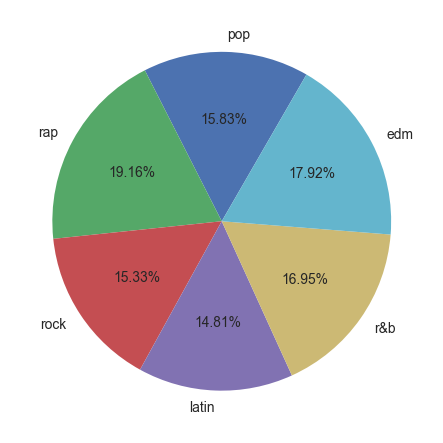

In [69]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.pie(genres_percents, autopct='%0.2f%%', labels=genres, startangle=60)

plt.show()

In [ ]:
X = 